## Import Libraries

In [41]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
X_boston,y_boston = data.copy(), target.copy()
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [4]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [5]:
all_data=np.concatenate([data,np.expand_dims(target,axis=1)],axis=1)
df=pd.DataFrame(data=all_data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','Price'])

## Q2: Print the head rows of the dataframe.

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

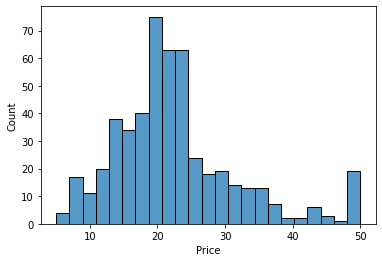

In [7]:
sns.histplot(df,x='Price');

## Q4: Use a heatmap to show the correlation between features and the target labels.

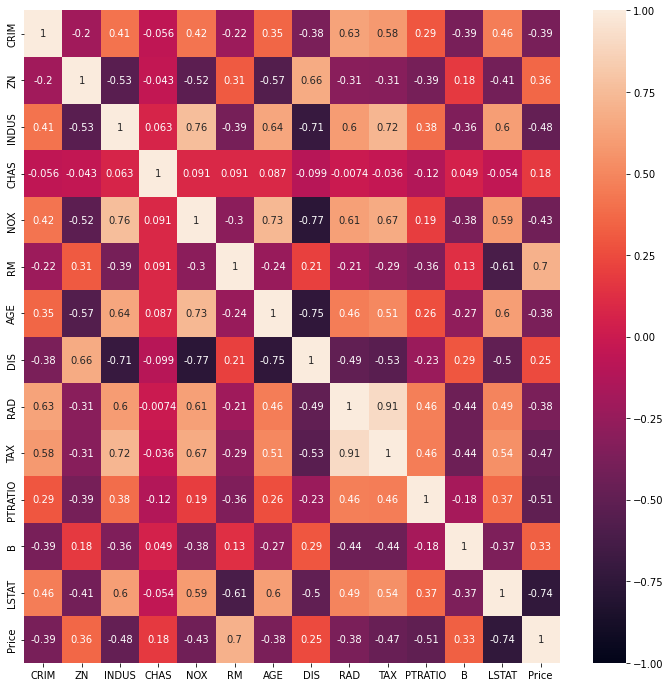

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),vmax=1,vmin=-1,annot=True);

## Q5: Use a lmplot to draw the relations between price and LSTAT.

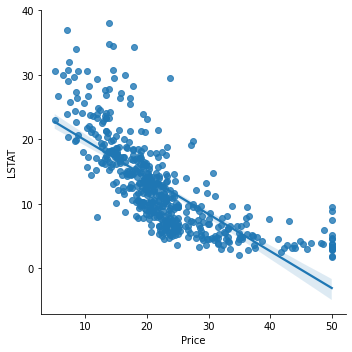

In [9]:
sns.lmplot(data=df,x='Price',y='LSTAT');

## Q6: Use a lmplot to draw the relations between price and RM.

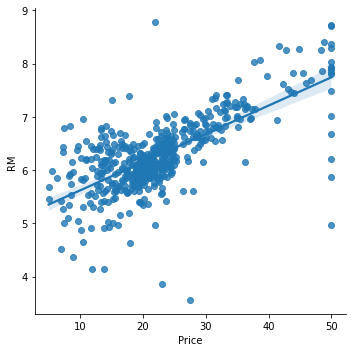

In [10]:
sns.lmplot(data=df,x='Price',y='RM');

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [12]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=23)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


## Q8: Build a Linear Regression Model.

# Sklearn

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
sk_model=LinearRegression()

# from scratch

In [49]:
!git clone https://github.com/Faris-ML/Auto-Differentiation-Package.git

fatal: destination path 'Auto-Differentiation-Package' already exists and is not an empty directory.


In [50]:
import sys
import os
sys.path.append(os.path.abspath("Auto-Differentiation-Package/"))

In [65]:
from Graph import Graph
from Node import *

In [66]:
m = X_train.shape[0]
x=Constant(X_train,'x')
y=Constant(np.expand_dims(y_train,axis=1),'y')
z=Constant(2,'z')

w=Variable(np.zeros([X_train.shape[1],1]),'w')
b=Variable(0,'b')

my_model = add(dot(x,w),b)
training_model = power(sub(my_model,y),z)

graph=Graph(training_model)

In [67]:
num_of_itter = 800000
alpha = 6e-6
for i in range(num_of_itter+1):
    
    pred=graph.forward()
    if i%100000==0:
        print('epoch '+str(i)+'/'+str(num_of_itter)+' MSE : '+str(np.sum(pred)/m))
    
    grads=graph.backward(just_Variabls=True)
    
    
    new_w = graph.Nodes['w'].value - alpha*(np.sum(grads['w'].grad,axis=0,keepdims=True).T/(2*m))
    new_b = graph.Nodes['b'].value - alpha*(np.sum(grads['b'].grad)/(2*m))

    graph.Nodes['w'].value=new_w
    graph.Nodes['b'].value=new_b
    
    

epoch 0/800000 MSE : 594.1022881355933
epoch 100000/800000 MSE : 33.147156712805696
epoch 200000/800000 MSE : 27.708593139920747
epoch 300000/800000 MSE : 25.113147158800164
epoch 400000/800000 MSE : 23.863891455801202
epoch 500000/800000 MSE : 23.253291063617706
epoch 600000/800000 MSE : 22.946446983008602
epoch 700000/800000 MSE : 22.784712666289973
epoch 800000/800000 MSE : 22.69287163954026


In [68]:
x_t=Constant(X_test,'x')
w=graph.Nodes['w']
b=graph.Nodes['b']

my_model = add(dot(x_t,w),b)

graph_t=Graph(my_model)

In [69]:
y_pred=graph_t.forward()

In [70]:
y_pred.shape

(152, 1)

In [71]:
print('MAE', mean_absolute_error(y_test,y_pred))

MAE 3.8445735727352384


## Q9: Train the Model.

In [22]:
sk_model.fit(X_train,y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [23]:
sk_model.intercept_

27.78960670325113

In [24]:
y_pred=sk_model.predict(X_test)

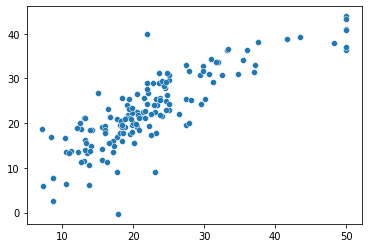

In [25]:
sns.scatterplot(x=y_test,y=y_pred);

## Residual Histogram

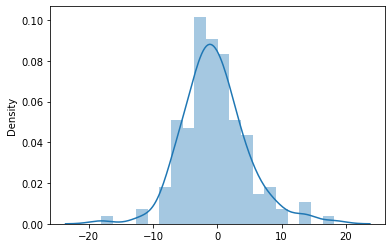

In [26]:
sns.distplot((y_test-y_pred),bins=20);

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [28]:
print('MSE', mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('R2',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE 25.358577194007044
MAE 3.7824295112050343
R2 0.6947991644651341
RMSE 5.035730055712582
